In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
from math import atan

In [3]:
curves=((500,200,15,5),
        (620,300,20,2),
        (770,350,15,5),
        (790,400,10,3))

def sample(x):
    steady_state,start_value,start_rate,noise = random.choice(curves)
    start_delta = steady_state - start_value
    return start_value + start_delta * atan((x/start_rate)**2.) + np.random.normal(scale=noise)

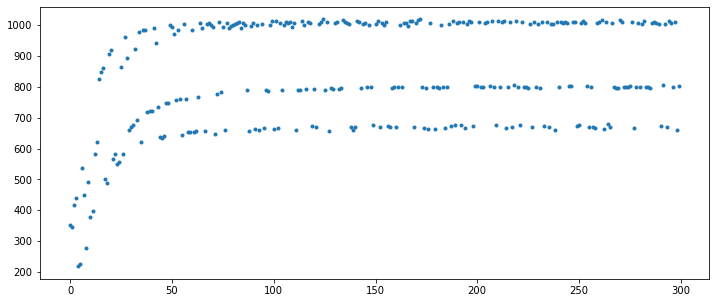

In [65]:
nsamp = 300
x=np.arange(nsamp)
y=[sample(i) for i in range(nsamp)]

plt.figure(figsize=(12,5))
plt.plot(x,y,'.')
plt.show()

## Slope

Final Slope = 0.08853620580347904


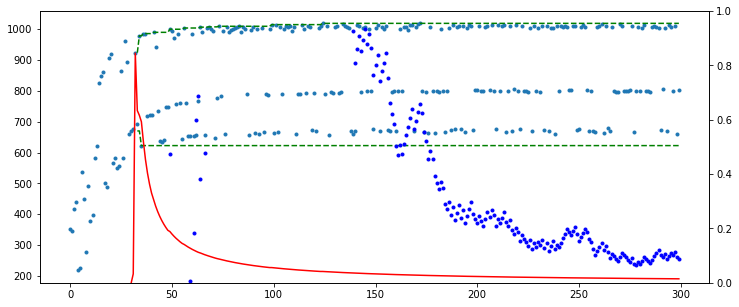

In [66]:
startup = 0.1
first_fit = int(startup * nsamp)
nfit = nsamp - first_fit

xfit = x[first_fit:]
yfit = y[first_fit:]

Sx = np.cumsum(xfit)[1:]
Sy = np.cumsum(yfit)[1:]
Sxx = np.cumsum(xfit*xfit)[1:]
Sxy = np.cumsum(xfit*yfit)[1:]
n = range(2,1+nfit)
fit_slope = (n*Sxy-Sx*Sy)/(n*Sxx-Sx*Sx)

minY = np.minimum.accumulate(yfit)
maxY = np.maximum.accumulate(yfit)
spanY = maxY-minY
slope_limit = (spanY / np.arange(1,1+nfit))/100

fig = plt.figure(figsize=(12,5))
gs = fig.add_gridspec(1,1)
axs = gs.subplots()
axs.plot(x,y,'.')
axs.plot(xfit[3:],minY[3:],'g--')
axs.plot(xfit[3:],maxY[3:],'g--')
axs = axs.twinx()
axs.plot(xfit[1:],np.abs(fit_slope),'b.')
axs.plot(xfit,slope_limit,'r')
plt.ylim(bottom=0,top=1)

print(f'Final Slope = {fit_slope[-1]}')

In [43]:
n

range(1, 271)

## Predictive Correlation

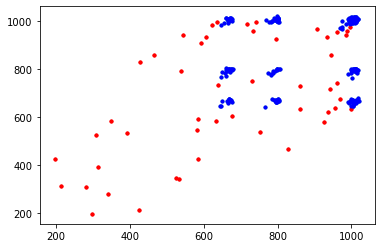

In [8]:
qx = y[:-1]
qy = y[1:]
plt.plot(qx[:50],qy[:50],'r.')
plt.plot(qx[50:],qy[50:],'.')

plt.plot(qx[:50],qy[:50],'r.')
plt.plot(qx[50:],qy[50:],'b.')